In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape


(13320, 9)

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
# area type
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df=df.drop(['availability','society' ], axis=1)
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [8]:
df['location'].nunique()

1305

In [9]:
df.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [10]:
# dropping bathroom, size ==null
df.dropna(subset=['bath'], inplace=True)

In [11]:
df.dropna(subset=['size'], inplace=True)

In [12]:
df.isnull().sum()

area_type       0
location        1
size            0
total_sqft      0
bath            0
balcony       536
price           0
dtype: int64

In [13]:
df['balcony'].fillna(0, inplace=True)

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [16]:
# explore the size
df['size'].nunique()

31

In [17]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df['BHK']=df['size'].apply(lambda x:int(x.split(' ')[0]))
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [19]:
df['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df[df.BHK>20]

,area_type,location,size,total_sqft,bath,balcony,price,BHK
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [21]:
df=df.drop(['size'], axis=1)
df.head(2)

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4


In [22]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
# there is some range
# '1133 - 1384'
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
        
df[~df.total_sqft.apply(is_float)]

,area_type,location,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [24]:
def convert_to_num(x):
    token=x.split('-')
    if len(token)==2:
        return (  float(token[0]) + float(token[1])  )/2
    try:
        return float(x)
    except:
        return 0



In [25]:
# test
convert_to_num('25')

25.0

In [26]:
convert_to_num('58ss')

0

In [27]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [28]:
df2=df.copy()
df2['total_area']=df2.total_sqft.apply(convert_to_num)
df2.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,total_area
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2,1200.0


In [29]:
df2.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
total_sqft             2100 - 2850
bath                           4.0
balcony                        0.0
price                        186.0
BHK                              4
total_area                  2475.0
Name: 30, dtype: object

In [30]:
df2[~df2.total_area.apply(lambda x:x!=0)].head()

,area_type,location,total_sqft,bath,balcony,price,BHK,total_area
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,0.0,18.5,1,0.0
648,Built-up Area,Arekere,4125Perch,9.0,0.0,265.0,9,0.0
775,Built-up Area,Basavanagara,1000Sq. Meter,2.0,1.0,93.0,1,0.0
872,Super built-up Area,Singapura Village,1100Sq. Yards,2.0,0.0,45.0,2,0.0
1019,Plot Area,Marathi Layout,5.31Acres,1.0,0.0,110.0,1,0.0


In [31]:
df2[~df2.total_area.apply(lambda x:x!=0)].shape

(46, 8)

In [32]:
data = {
    'Area': ['34.46Sq. Meter', '45.67Sq. Meter', '12.34Sq. Meter']
}

random = pd.DataFrame(data)

# Use regular expressions to extract the numeric part and unit of measurement
pattern =r'([\d.]+)(Sq\.\s?[A-Za-z\s]+)'
random[['Numeric', 'Unit']] =random['Area'].str.extract(pattern)
random

,Area,Numeric,Unit
0,34.46Sq. Meter,34.46,Sq. Meter
1,45.67Sq. Meter,45.67,Sq. Meter
2,12.34Sq. Meter,12.34,Sq. Meter


In [33]:
df2.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,total_area
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2,1200.0


In [34]:
pattern =r'([\d.]+)(Sq\.\s?[A-Za-z\s]+)'
df2[['Numeric', 'Unit']] =df2['total_sqft'].str.extract(pattern)
df2.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,total_area,Numeric,Unit
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0,NaN,NaN
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0,NaN,NaN
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0,NaN,NaN
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0,NaN,NaN
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2,1200.0,NaN,NaN


In [35]:
df2.loc[410]

area_type     Super built-up  Area
location                   Kengeri
total_sqft          34.46Sq. Meter
bath                           1.0
balcony                        0.0
price                         18.5
BHK                              1
total_area                     0.0
Numeric                      34.46
Unit                     Sq. Meter
Name: 410, dtype: object

In [36]:
df2.Unit.unique()

array([nan, 'Sq. Meter', 'Sq. Yards'], dtype=object)

In [37]:
conversion_factors = {
    'Sq. Meter': 10.7639,  # Conversion factor from square meters to square feet
    # Add more unit conversions as needed
    'Sq. Yards':9
}

In [38]:
def convert_to_sqft(row):
    val=row['Numeric']
    unit=row['Unit']
    prev=row['total_area']
    if val!=np.NaN and unit!=np.NaN:
        val=float(val)
        return val*conversion_factors.get(unit,1.0)
    
    return float(prev)
    

In [39]:
df2['converted_all_area']=df2.apply(convert_to_sqft, axis=1)

In [40]:
df2.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,total_area,Numeric,Unit,converted_all_area
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0,NaN,NaN,NaN
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0,NaN,NaN,NaN
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0,NaN,NaN,NaN
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0,NaN,NaN,NaN
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2,1200.0,NaN,NaN,NaN


In [41]:
df2.loc[1]

area_type                   Plot  Area
location              Chikka Tirupathi
total_sqft                        2600
bath                               5.0
balcony                            3.0
price                            120.0
BHK                                  4
total_area                      2600.0
Numeric                            NaN
Unit                               NaN
converted_all_area                 NaN
Name: 1, dtype: object

In [42]:
df2[~df2.total_area.apply(lambda x:x!=0)].isnull().sum()

area_type              0
location               0
total_sqft             0
bath                   0
balcony                0
price                  0
BHK                    0
total_area             0
Numeric               14
Unit                  14
converted_all_area    14
dtype: int64

In [43]:
def final_convert(row):
    val=row['converted_all_area']
    prev=row['total_area']
    if prev>0:
        return prev
    try:
        return float(val)
    except:
        return None
                     
        

In [44]:
df2['final_area']=df2.apply(final_convert, axis=1)
df2.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,total_area,Numeric,Unit,converted_all_area,final_area
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0,NaN,NaN,NaN,1056.0
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0,NaN,NaN,NaN,2600.0
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0,NaN,NaN,NaN,1440.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0,NaN,NaN,NaN,1521.0
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2,1200.0,NaN,NaN,NaN,1200.0


In [45]:
df2.final_area.isnull().sum()

14

In [46]:
df2.columns

Index(['area_type', 'location', 'total_sqft', 'bath', 'balcony', 'price',
       'BHK', 'total_area', 'Numeric', 'Unit', 'converted_all_area',
       'final_area'],
      dtype='object')

In [47]:
df2=df2.drop(columns=['total_sqft','total_area','Numeric','Unit', 'converted_all_area'])


In [48]:
df2.head()

,area_type,location,bath,balcony,price,BHK,final_area
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0


In [49]:
df2.loc[648]

area_type     Built-up  Area
location             Arekere
bath                     9.0
balcony                  0.0
price                  265.0
BHK                        9
final_area               NaN
Name: 648, dtype: object

In [50]:
df2 = df2.dropna(subset=['final_area'])

In [51]:
df2.isnull().sum()

area_type     0
location      0
bath          0
balcony       0
price         0
BHK           0
final_area    0
dtype: int64

In [52]:
df2.head()

,area_type,location,bath,balcony,price,BHK,final_area
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0


In [53]:
df3=df2.copy()
df3['price_per_sqft']=df3['price']*100000/df3['final_area']
df3.head()


,area_type,location,bath,balcony,price,BHK,final_area,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


In [54]:
df3[df3.BHK>20]

,area_type,location,bath,balcony,price,BHK,final_area,price_per_sqft
1718,Super built-up Area,2Electronic City Phase II,27.0,0.0,230.0,27,8000.0,2875.0
4684,Plot Area,Munnekollal,40.0,0.0,660.0,43,2400.0,27500.0


In [55]:
len(df3.location.unique())

1299

In [56]:
len(df3.area_type.unique())

4

In [57]:
df3.shape

(13232, 8)

In [58]:
df3.location=df3.location.apply(lambda x:x.strip())
# remove leading /end space
location_stat=df3.groupby('location')['location'].agg('count')
location_stat

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1288, dtype: int64

In [59]:
location_stat=location_stat.sort_values(ascending=False)
location_stat

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1288, dtype: int64

In [60]:
len(location_stat[location_stat<=10])

1048

In [61]:
other_loc=location_stat[location_stat<=10]
other_loc

location
Nagappa Reddy Layout     10
Sadashiva Nagar          10
Ganga Nagar              10
Sector 1 HSR Layout      10
BTM 1st Stage            10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1048, dtype: int64

In [62]:
df3.location=df.location.apply(lambda x:'other' if x in other_loc else x)
len(df3.location.unique())

282

In [63]:
df3.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
other                     2814
Whitefield                 534
Sarjapur  Road             392
Electronic City            302
Kanakpura Road             264
                          ... 
Jayanagar,                   1
Kanakapura Road,             1
Kudlu Village,               1
Near Electronic City,        1
JP nagar 9th Phase,          1
Name: location, Length: 282, dtype: int64

## OUTLIER DETECTION

In [64]:
df3.head()

,area_type,location,bath,balcony,price,BHK,final_area,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


In [65]:
df3[df3.BHK*225+df3.bath*40+df3.balcony*30>df3.final_area].shape

(677, 8)

In [66]:
df4=df3[~(df3.BHK*250+df3.bath*50+df3.balcony*30>df3.final_area)]
df4.shape

(12349, 8)

In [67]:
df4.price_per_sqft.describe()

count     12349.000000
mean       6226.294236
std        4067.009121
min         267.829813
25%        4200.000000
50%        5272.727273
75%        6855.439642
max      176470.588235
Name: price_per_sqft, dtype: float64

In [68]:
def remove_pps_outlier(df):
    df_out=pd.DataFrame()#blank df
    for key, subdf in df.groupby(['area_type','location']):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
#         print(key, m-sd,' ',m+sd)
        reduce_df=subdf[(subdf.price_per_sqft>(m-1.25*sd)) & (subdf.price_per_sqft<=(m+1.25*sd))]
        df_out=pd.concat([df_out,reduce_df], ignore_index=True)
    return df_out

In [69]:
df4.isnull().sum()

area_type         0
location          0
bath              0
balcony           0
price             0
BHK               0
final_area        0
price_per_sqft    0
dtype: int64

In [165]:
df5=remove_pps_outlier(df4)
df5.shape

(10334, 8)

In [166]:
def plot_scatter(df, location):
    bhk2=df[(df.location==location)& (df.BHK==2)]
    bhk3=df[(df.location==location) & (df.BHK==3)]
    plt.figure(figsize=(10, 6))
    plt.scatter(bhk2.final_area, bhk2.price, color='b', label='2BHK', s=50)
    plt.scatter(bhk3.final_area, bhk3.price, color='r', label='3BHK',marker='+', s=50)
    plt.xlabel('Total sq ft area')
    plt.ylabel('price (in lakhs)')
    
    plt.legend()
    

In [167]:
df5.location.unique()[:5]

array([' Electronic City', '1st Phase JP Nagar', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar'], dtype=object)

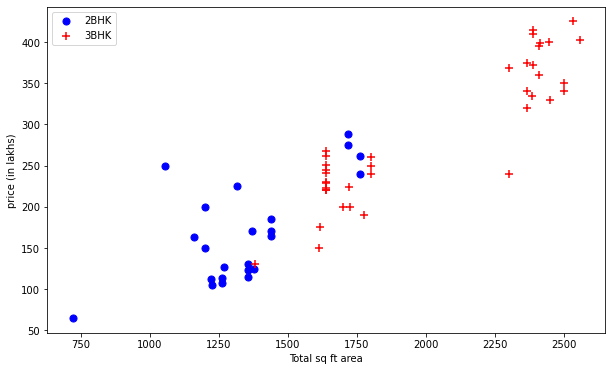

In [73]:
plot_scatter(df5, 'Rajaji Nagar')

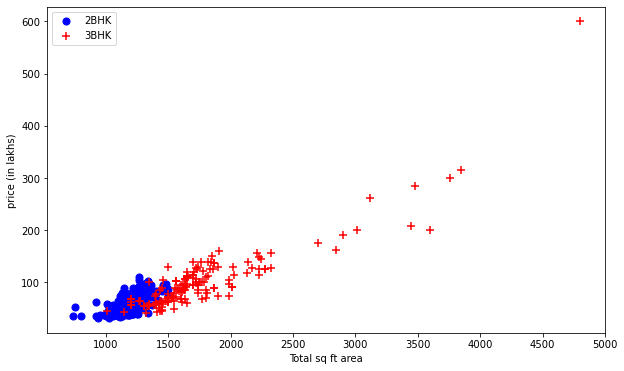

In [168]:
plot_scatter(df5, 'Whitefield')

Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function

#### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment


In [169]:
def remove_bhk_outlier(df):
    exclude_idx=np.array([])#blank array
    for location, loc_df in df.groupby('location'):
        bhk_stat={}
        for bhk, bhk_df in loc_df.groupby('BHK'):
            bhk_stat[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in loc_df.groupby('BHK'):
            stats=bhk_stat.get(bhk-1)
            if stats and stats['count']>5:
                exclude_idx=np.append(exclude_idx, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)        
#                 append k liye 1st arg positn then what to append
    print(exclude_idx)
#     print(bhk_stat)
    return df.drop(exclude_idx, axis=0)
                

In [170]:
df6=remove_bhk_outlier(df5)

[3071.   11. 3097. ... 1849. 1959. 2758.]


In [171]:
df6.shape[0], df5.shape[0]

(7338, 10334)

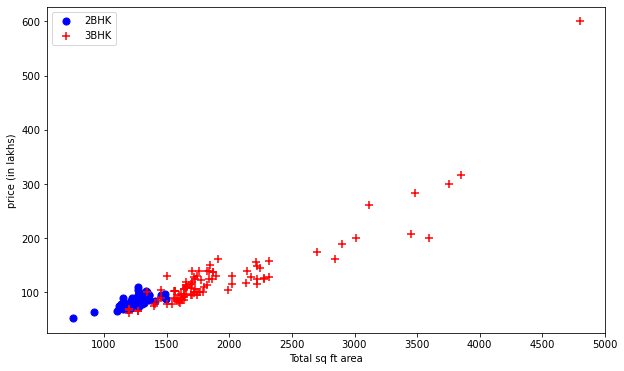

In [173]:
plot_scatter(df6, 'Whitefield')

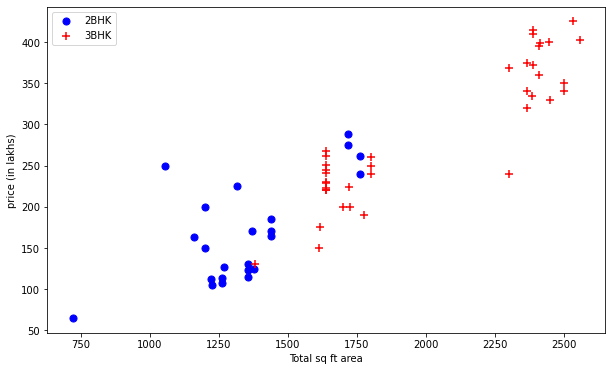

In [80]:
plot_scatter(df5, 'Rajaji Nagar')

Text(0, 0.5, 'Count')

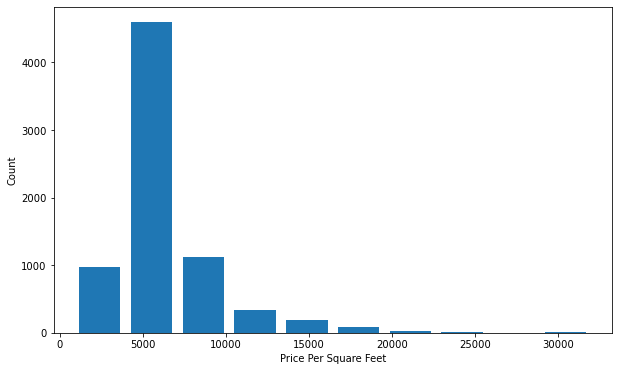

In [174]:
plt.figure(figsize=(10, 6))
plt.hist(df6.price_per_sqft,rwidth=0.8)

plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [175]:
df6.bath.unique()

array([ 1.,  5.,  2.,  3.,  4.,  6.,  8.,  7.,  9., 14., 12., 16., 13.])

In [176]:
df6.groupby('bath')['bath'].agg('count')

bath
1.0      565
2.0     4118
3.0     1746
4.0      553
5.0      217
6.0       90
7.0       22
8.0       12
9.0        9
12.0       3
13.0       1
14.0       1
16.0       1
Name: bath, dtype: int64

In [177]:
df6[df6.bath>df6.BHK+2]

,area_type,location,bath,balcony,price,BHK,final_area,price_per_sqft
283,Built-up Area,Chikkabanavar,7.0,2.0,80.0,4,2460.0,3252.032520
2667,Plot Area,other,14.0,0.0,500.0,9,3300.0,15151.515152
8128,Super built-up Area,Thanisandra,6.0,2.0,116.0,3,1806.0,6423.034330
9342,Super built-up Area,other,9.0,1.0,1000.0,6,11338.0,8819.897689


Text(0, 0.5, 'Count')

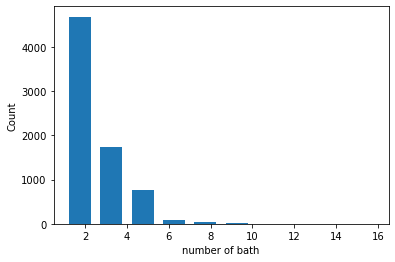

In [178]:
plt.hist(df6.bath, rwidth=0.7)
plt.xlabel("number of bath")
plt.ylabel("Count")

In [179]:
df7=df6[~(df6.bath>df6.BHK+2)]
df7.shape[0]

7334

In [180]:
df7.groupby('balcony')['balcony'].agg('count')

balcony
0.0     806
1.0    2959
2.0    2749
3.0     820
Name: balcony, dtype: int64

In [181]:
df7.columns


Index(['area_type', 'location', 'bath', 'balcony', 'price', 'BHK',
       'final_area', 'price_per_sqft'],
      dtype='object')

In [182]:
df8=df6.drop(columns=['price_per_sqft','area_type'])
df8.head()

,location,bath,balcony,price,BHK,final_area
0,Electronic City,1.0,1.0,19.5,1,435.000000
1,Electronic City,1.0,1.0,27.0,1,550.000000
2,1st Phase JP Nagar,5.0,0.0,85.0,5,1500.000000
3,1st Phase JP Nagar,1.0,1.0,63.0,1,839.907117
4,1st Phase JP Nagar,2.0,2.0,50.0,1,840.000000


## ML ALGO PREP

In [183]:
len(df8.location.unique())

255

In [184]:
dummies=pd.get_dummies(df8.location,  prefix='location')
df9 = pd.concat([df8, dummies], axis=1)
df9.drop(['location'], axis=1, inplace=True)


In [185]:
df9.drop(['location_other'], axis=1, inplace=True)
df9.head()

,bath,balcony,price,BHK,final_area,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,"location_Whitefield,",location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,1.0,1.0,19.5,1,435.000000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,27.0,1,550.000000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,0.0,85.0,5,1500.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,63.0,1,839.907117,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,50.0,1,840.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
df9.shape

(7338, 259)

In [187]:
X=df9.drop(['price'], axis=1)
y=df9.price

In [188]:
X.shape

(7338, 258)

In [189]:
y.shape

(7338,)

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)

In [191]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.7731986005727262

In [147]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.73048065, 0.77099891, 0.69260695, 0.77016875, 0.6780704 ])

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [193]:
y.shape

(7338,)

In [194]:
model_params={
        
        'lr':{
            'model': LinearRegression(),
            'params':{
                'normalize':[False,True]
            }
        },
         
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random', 'cyclic']
             }
        },
        'dt':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion' : ["mse", "friedman_mse"],
                'splitter' : ["best", "random"]
                
            }
        }
        

    }

In [195]:

def find_best_fit(X, y):
    score=[]
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for model_name, mp in model_params.items():
        cif=GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
        cif.fit(X,y)
        score.append({
            'model':model_name,
            'best_score': cif.best_score_,
            'best_params': cif.best_params_
        })
    return pd.DataFrame(score, columns=['model', 'best_score', 'best_params'])

In [196]:
find_best_fit(X, y)

,model,best_score,best_params
0,lr,0.750797,{'normalize': False}
1,lasso,0.659068,"{'alpha': 1, 'selection': 'random'}"
2,dt,0.573664,"{'criterion': 'mse', 'splitter': 'best'}"


In [198]:
lr_clf=LinearRegression(normalize=False)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.7731986005727262

In [199]:
X.columns


Index(['bath', 'balcony', 'BHK', 'final_area', 'location_ Devarabeesana Halli',
       'location_ Devarachikkanahalli', 'location_ Electronic City',
       'location_ Mysore Highway', 'location_ Rachenahalli',
       'location_ Thanisandra',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield', 'location_Whitefield, ',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=258)

In [200]:
X.head()

,bath,balcony,BHK,final_area,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,"location_Whitefield,",location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,1.0,1.0,1,435.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,1,550.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,0.0,5,1500.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,1,839.907117,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,1,840.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
np.where(X.columns=='location_ Electronic City')[0][0]

6

In [202]:
def predicted_price(loc, sqft, bhk, bath, balcony):
    loc='location_'+loc
    loc_idx=np.where(X.columns==loc)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=bath
    x[1]=balcony
    x[2]=bhk
    x[3]=sqft
    if(loc_idx>=0):
        x[loc_idx]=1
    return lr_clf.predict([x])[0]

In [205]:
predicted_price('Whitefield',2000,2,1,0)

154.89907310261032

In [209]:
import pickle
with open('blr_home_price_est.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [211]:
import json
columns={
    'data_columns':[col for col in X.columns]
}
with open('columns.json', 'w') as f:
    json.dump(columns, f)